# SUNLE

In [24]:
a = 1

In [2]:
from experiments_utils.fetching import ResultsManager
r = ResultsManager("icml")

In [6]:
rs = []
for t in ("lotka_volterra", "slcp", "gaussian_linear_uniform", "two_moons"):
    print(t)
    eval_result = r.fetch_evaluation_results(
        experience_name="test_log_normalizer",
        task=t,
        num_samples=(10000,) * 10
    )
    rs.append(eval_result)

lotka_volterra
slcp
gaussian_linear_uniform
two_moons


In [9]:
result = r.fetch_one_result(
        experience_name="test_log_normalizer",
        task="gaussian_linear_uniform",
        num_samples=(10000,) * 10,
        num_observation=1
)
ret = result.result

In [13]:
# ret.train_results.single_round_results[-1].inference_state.log_prob.log_prob.theta

In [14]:
import pandas as pd
eval_result = pd.concat(rs)

In [28]:
# with open('df_sunle_cached.pkl', 'wb') as f:
#     import pickle
#     pickle.dump(eval_result, f)
#     
# with open('df_aunle_cached.pkl', 'wb') as f:
#     import pickle
#     pickle.dump(eval_result_aunle, f)

In [3]:

with open('df_sunle_cached.pkl', 'rb') as f:
    import pickle
    eval_result = pickle.load(f)
    
with open('df_aunle_cached.pkl', 'rb') as f:
    import pickle
    eval_result_aunle = pickle.load(f)

In [4]:
# eval_result_aunle = r.fetch_evaluation_results(
#     # experience_name="paper_more_seeds_mi2000d5w150",
#     experience_name="paper_more_seeds_mi2000",
#     # num_samples=(10000,),
# )

In [5]:
def get_metadata(eres):
    num_unique_fields = eres.reset_index().apply(lambda x: len(x.unique()))
    nonunique_fields = list(num_unique_fields[num_unique_fields > 1].index.values)
    assert set(nonunique_fields).issubset(set(['num_samples', 'num_observation', 'mmd', 'c2st', 'random_seed', 'learning_rate', 'task']))
    
    return eres.reset_index()[nonunique_fields]

In [6]:
def format_unique_fielded_df(df, ebm_model_type, task=None):
    df = df.copy()
    
    if ebm_model_type == "likelihood":
        df['algorithm'] = "SUNLE"
    else:
        assert ebm_model_type == "joint_tilted"
        df['algorithm'] = "AUNLE"
        
    if task is not None:
        df['task'] = task
        
    num_simulations_str_map = {100000: "10⁵", 10000: "10⁴", 1000: "10³"}
    
    
    df['num_simulations'] = df.num_samples.apply(lambda x: num_simulations_str_map[sum(x)])
    df['num_rounds'] = df.num_samples.apply(len)
    
    df = df.drop("num_samples", axis=1)
    
    df = df.rename(columns={"c2st": "C2ST", "mmd": "MMD"})
    return df

In [8]:
import pandas as pd
all_res = pd.concat(
    [format_unique_fielded_df(get_metadata(eval_result_aunle), "joint_tilted"), format_unique_fielded_df(get_metadata(eval_result), "likelihood")]
)

In [39]:
# configs = (
#     # dict(task="two_moons", ebm_model_type="joint_tilted", sampler="smc"),
#     # dict(task="two_moons"),
#     dict(task="two_moons", experience_name="paper_more_seeds", ebm_model_type="joint_tilted"),
#     dict(task="two_moons", experience_name="paper_more_seeds", ebm_model_type="likelihood", inference_num_warmup_steps=2000, num_mala_steps=200),
#     dict(task="slcp", experience_name="paper_more_seeds", ebm_model_type="joint_tilted"),
#     dict(task="slcp", experience_name="paper_more_seeds", ebm_model_type="likelihood", inference_num_warmup_steps=2000, num_mala_steps=200),
#     dict(task="lotka_volterra", experience_name="paper_more_seeds", ebm_model_type="joint_tilted"),
#     dict(task="lotka_volterra", experience_name="paper_more_seeds", ebm_model_type="likelihood", inference_num_warmup_steps=2000, num_mala_steps=200),
#     dict(task="gaussian_linear_uniform", experience_name="paper_more_seeds", ebm_model_type="joint_tilted"),
#     dict(task="gaussian_linear_uniform", experience_name="paper_more_seeds", ebm_model_type="likelihood", inference_num_warmup_steps=2000, num_mala_steps=200),
#     # dict(task="two_moons", ebm_model_type="likelihood", sampler="mala", num_mala_steps=200, inference_num_warmup_steps=2000, max_iter=2000),
#     # dict(task="slcp", ebm_model_type="joint_tilted", sampler="smc"),
#     # dict(task="slcp", ebm_model_type="likelihood", sampler="mala", num_mala_steps=200, inference_num_warmup_steps=2000, max_iter=2000),
#     # dict(experience_name="paper", task="lotka_volterra", ebm_model_type="joint_tilted"),
#     # dict(experience_name="paper", learning_rate=0.001, task="lotka_volterra", ebm_model_type="likelihood", sampler="mala", num_mala_steps=200, inference_num_warmup_steps=2000, max_iter=2000),
#     # dict(task="gaussian_linear_uniform", ebm_model_type="joint_tilted", sampler="smc"),
#     # dict(task="gaussian_linear_uniform", ebm_model_type="likelihood", sampler="mala", num_mala_steps=200, inference_num_warmup_steps=2000, max_iter=2000),
# )

In [40]:
from sbibm import get_results
sbibm_results = get_results()
sbibm_results['num_rounds'] = [10 if m in ("SNRE", "SNPE", "SNLE") else 1 for m in sbibm_results.algorithm.values]

In [41]:
sbibm_results_mini = sbibm_results[['task', 'num_simulations', "num_rounds", 'algorithm', 'num_observation', 'MMD', 'C2ST']]

In [42]:
#eres

In [43]:
# results = []
# for i, c in enumerate(configs):
#     eres = r.fetch_evaluation_results(**c)
#     print(c, len(eres))
#     df = get_metadata(eres)
#     df = format_unique_fielded_df(df, c['ebm_model_type'], c["task"])
#     results.append(df)

In [44]:
# df

In [45]:
# import pandas as pd
# from sbibm.visualisation import fig_metric
# all_unle_results = pd.concat(results, axis=0)
# all_unle_results_f = all_unle_results.loc[(all_unle_results['algorithm'] == "AUNLE").values | (all_unle_results['num_rounds'] == 10).values]

In [89]:
all_results = pd.concat([sbibm_results_mini, all_res], axis=0)

In [90]:
ar = all_results.set_index([c for c in all_results.columns if c not in ("MMD", "C2ST")])

In [121]:
num_simulations_str_map = {"10⁵": 100000, "10⁴": 10000, "10³": 1000}
# reverse_num_simulations_str_map = {v: k for k, v in num_simulations_str_map.items()}

## Grab SMNLE Results

In [92]:
# !cp ../appendix/results_all.pkl ./results_all.pkl

In [9]:
with open('results_all.pkl', 'rb') as f:
    import pickle
    smnle_results_ssm= pickle.load(f)
    
with open('results_all_sm.pkl', 'rb') as f:
    import pickle
    smnle_results_sm = pickle.load(f)

In [94]:
import pandas as pd
smnle_results_ssm = dict(smnle_results_ssm)
smnle_results_sm = dict(smnle_results_sm)

In [95]:
df_sm = pd.concat(
    {k: pd.DataFrame(v) for k, v in smnle_results_sm.items()},
    names=("task", "num_observation", "lr", "num_samples")
)

df_ssm = pd.concat(
    {k: pd.DataFrame(v) for k, v in smnle_results_ssm.items()},
    names=("task", "num_observation", "lr", "num_samples")
)


df = pd.concat({'SMNLE(SM)': df_sm, 'SMNLE(SSM)': df_ssm}, names=('algorithm',))


df = df.applymap(lambda x: x.item()).reset_index(-1, drop=True)

In [96]:
df.index = df.index.set_names("num_simulations",level="num_samples")
df.index = df.index.set_levels(["10³", "10⁴", "10⁵"] ,level="num_simulations")

In [97]:
avg_results = df.groupby(["task", "num_simulations", "algorithm"])

In [98]:
new_gs = []
for n, g in avg_results:
    mean_per_lr = g.mmd.groupby(level="lr").mean()
    best_lr = mean_per_lr.index[mean_per_lr.argmin()]
    new_g = g.xs(best_lr, level="lr", drop_level=False)
    new_gs.append(new_g)
    
best_results = pd.concat(new_gs)
best_results = best_results.rename(columns={"c2st": "C2ST", "mmd": "MMD"})

In [99]:
best_results_mean = best_results.groupby(["task", "num_simulations", "algorithm"]).mean()
best_results_std = best_results.groupby(["task", "num_simulations", "algorithm"]).mean()

In [100]:
best_smnle_results = best_results.copy()
# best_smnle_results['algorithm'] = "SMNLE"
best_smnle_results['num_rounds'] = 1

In [101]:
# metric = "C2ST"
# task = "two_moons"
# best_results.xs(task, level="task").groupby("num_samples")[metric]

In [102]:
# all_results = pd.concat(
#     [all_results, best_smnle_results.xs("SMNLE(SSM)", level="algorithm", drop_level=False).reset_index().drop('lr', axis=1)], axis=0)
all_results = pd.concat(
    [all_results, best_smnle_results.reset_index().drop('lr', axis=1)], axis=0)

In [103]:
num_simulations_str_map = {"10⁵": 100000, "10⁴": 10000, "10³": 1000}

In [104]:
all_results.algorithm.unique()

array(['NRE', 'SNRE', 'REJ-ABC', 'SMC-ABC', 'SNLE', 'NLE', 'SNPE', 'NPE',
       'AUNLE', 'SUNLE', 'SMNLE(SM)', 'SMNLE(SSM)'], dtype=object)

In [105]:
ar = all_results.set_index([c for c in all_results.columns if c not in ("MMD", "C2ST")])

In [106]:
# from sbibm import get_results
# sbibm_results = get_results()
# sbibm_results['num_rounds'] = [10 if m in ("SNRE", "SNPE", "SNLE") else 1 for m in sbibm_results.algorithm.values]

/tmp/ipykernel_1900546/3868138158.py:126: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.get_xaxis().set_ticklabels(
/tmp/ipykernel_1900546/3868138158.py:133: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.get_xaxis().set_ticklabels(


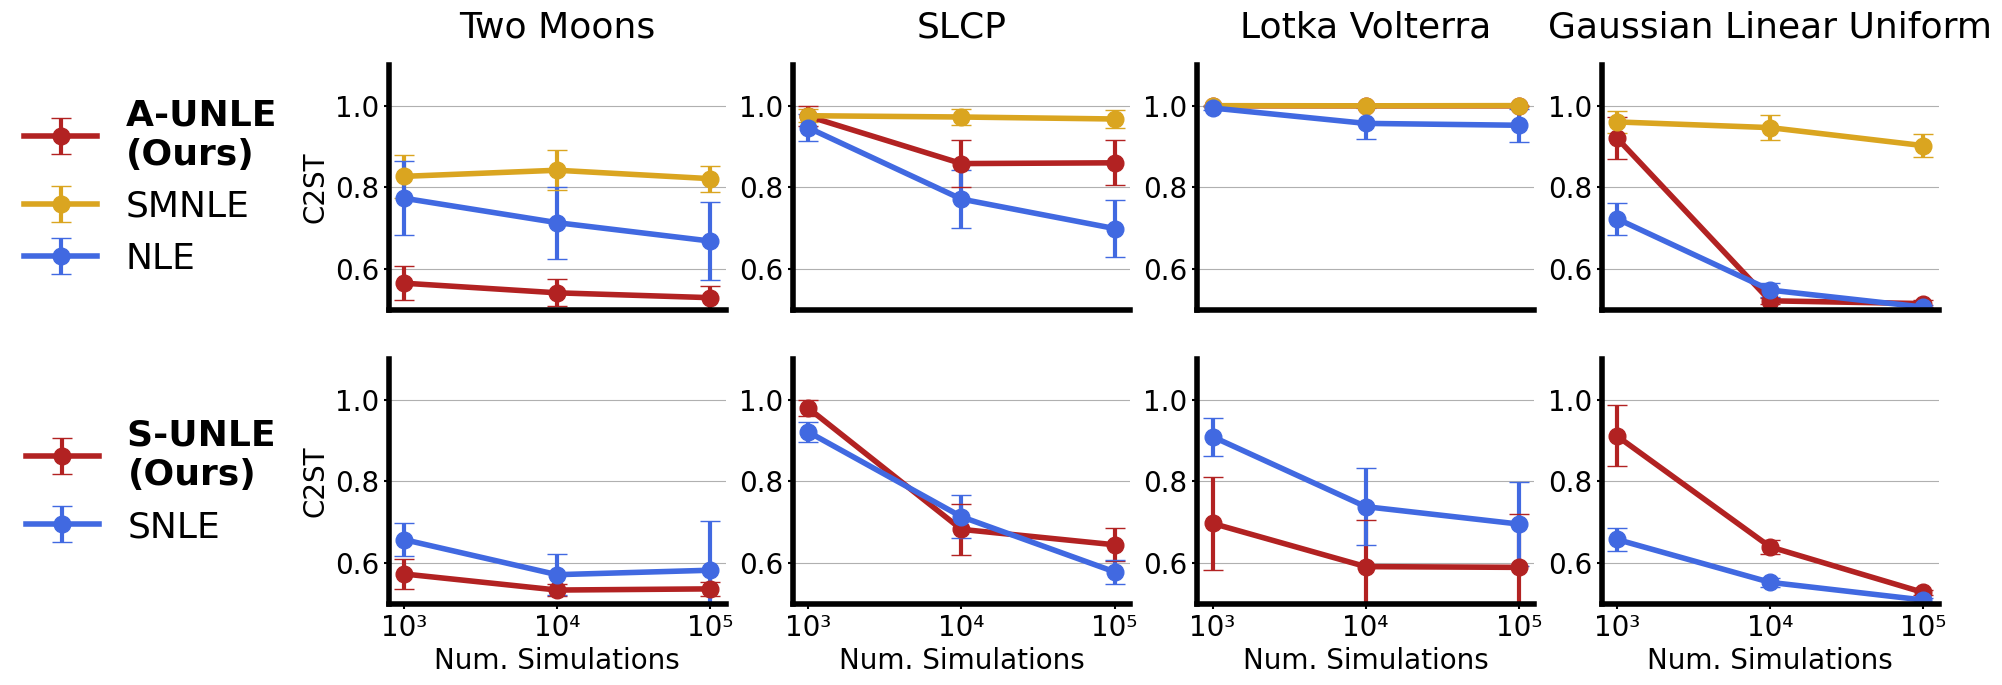

In [139]:
import matplotlib as mpl
import matplotlib.pyplot as plt

pretty_names = {
    "two_moons": "Two Moons",
    "slcp": "SLCP",
    "gaussian_linear_uniform": "Gaussian Linear Uniform",
    "lotka_volterra": "Lotka Volterra"
}
metric = "C2ST"
limits_metric = {
    "MMD": (0, 1),
    "C2ST": (0.5, 1.1)
}

errorbar_kws = dict(
    linewidth=4,
    elinewidth=3,
    markersize=12,
    capsize=7, 
    marker="o"
)


fontsize=26
tk_fontsize=20

with mpl.rc_context(fname='.matplotlibrc'):
    mpl.rc('font',family='DejaVu Sans')
    mpl.rc("text", usetex=False)
    
    # ax.plot(
    #     "-+",
    # )
    tasks = ("two_moons", "slcp", "lotka_volterra", "gaussian_linear_uniform")
    nrows = 2
    f, axss = plt.subplots(ncols=len(tasks), nrows=nrows, figsize=(5 * len(tasks), 3.5 * nrows))
    
    axs = axss[0]
        
    for t_no, task in enumerate(tasks):
        ax = axs[t_no]
        ax.grid(axis="y")
        for axis in ['bottom','left']:
            ax.spines[axis].set_linewidth(4)
            
        ax.errorbar(
            ar.xs(task, level="task").xs("AUNLE", level="algorithm").groupby("num_simulations")[metric].mean().index,
            ar.xs(task, level="task").xs("AUNLE", level="algorithm").groupby("num_simulations")[metric].mean(),
            ar.xs(task, level="task").xs("AUNLE", level="algorithm").groupby("num_simulations")[metric].std(),
            label="A-UNLE \n(Ours)",
            color="firebrick",
            **errorbar_kws
        )


        ax.errorbar(
            ar.xs(task, level="task").xs("SMNLE(SSM)", level="algorithm").groupby("num_simulations")[metric].mean().index,
            ar.xs(task, level="task").xs("SMNLE(SSM)", level="algorithm").groupby("num_simulations")[metric].mean(),
            ar.xs(task, level="task").xs("SMNLE(SSM)", level="algorithm").groupby("num_simulations")[metric].std(),
            label="SMNLE",
            color="goldenrod",
            **errorbar_kws
        )

        ax.set_ylim(*limits_metric[metric])
        ax.errorbar(
            ar.xs(task, level="task").xs("NLE", level="algorithm").groupby("num_simulations")[metric].mean().index,
            ar.xs(task, level="task").xs("NLE", level="algorithm").groupby("num_simulations")[metric].mean(),
            ar.xs(task, level="task").xs("NLE", level="algorithm").groupby("num_simulations")[metric].std(),
            label="NLE",
            color="royalblue",
            **errorbar_kws
        )


        ax.set_ylim(*limits_metric[metric])


        ax.set_title(pretty_names[task], fontsize=fontsize, pad=20)
        ax.tick_params(axis='both', labelsize=tk_fontsize)
        ax.get_xaxis().set_ticks([])

        
    l = axs[0].legend(fontsize=fontsize, bbox_to_anchor=(-0.2, 0.5), bbox_transform=axs[0].transAxes, loc="center right")
    axs[0].set_ylabel("C2ST", size=20)
    l.texts[0].set_weight("bold")
    
    axs = axss[1]
        
    for t_no, task in enumerate(tasks):
        ax = axs[t_no]
        ax.grid(axis="y")
        for axis in ['bottom','left']:
            ax.spines[axis].set_linewidth(4)
            
        ax.errorbar(
            ar.xs(task, level="task").xs("SUNLE", level="algorithm").groupby("num_simulations")[metric].mean().index,
            ar.xs(task, level="task").xs("SUNLE", level="algorithm").groupby("num_simulations")[metric].mean(),
            ar.xs(task, level="task").xs("SUNLE", level="algorithm").groupby("num_simulations")[metric].std(),
            label="S-UNLE \n(Ours)",
            color="firebrick",
            **errorbar_kws
        )



        ax.set_ylim(*limits_metric[metric])
        ax.errorbar(
            ar.xs(task, level="task").xs("SNLE", level="algorithm").groupby("num_simulations")[metric].mean().index,
            ar.xs(task, level="task").xs("SNLE", level="algorithm").groupby("num_simulations")[metric].mean(),
            ar.xs(task, level="task").xs("SNLE", level="algorithm").groupby("num_simulations")[metric].std(),
            label="SNLE",
            color="royalblue",
            **errorbar_kws
        )


        ax.set_ylim(*limits_metric[metric])


        # ax.set_title(pretty_names[task], fontsize=fontsize, pad=20)
        ax.tick_params(axis='both', labelsize=tk_fontsize)
        # ax.get_xaxis().set_ticks([])
        
        ax.get_xaxis().set_ticklabels(
            # [num_simulations_str_map[v] for v in 
            # ar.xs(task, level="task").xs("AUNLE", level="algorithm").groupby("num_simulations")[metric].mean().index.values]
            ar.xs(task, level="task").xs("AUNLE", level="algorithm").groupby("num_simulations")[metric].mean().index,
        )
        ax.set_xlabel("Num. Simulations", size=20)
        
        ax.get_xaxis().set_ticklabels(
            # [num_simulations_str_map[v] for v in 
            # ar.xs(task, level="task").xs("AUNLE", level="algorithm").groupby("num_simulations")[metric].mean().index.values]
            ar.xs(task, level="task").xs("AUNLE", level="algorithm").groupby("num_simulations")[metric].mean().index,
        )


        
    l = axs[1].legend(fontsize=fontsize, bbox_to_anchor=(-0.2, 0.5), bbox_transform=axs[0].transAxes, loc="center right")
    axs[0].set_ylabel("C2ST", size=20)
    l.texts[0].set_weight("bold")
    
    # l = axs[0].legend(fontsize=fontsize, bbox_to_anchor=(-0.1, 0.5), bbox_transform=axs[0].transAxes, loc="center right")
    # l.texts[0].set_weight("bold")
        
    # plt.errorbar(x, y + 3, yerr=yerr, label='both limits (default)')
    

    # ax.legend(fontsize=18)
    # 
    # ax.set_ylabel("Energy. Distance", fontsize=14)
    # ax.set_xlabel("Round No.", fontsize=14)
# f
f.savefig("figures/c2st_sbibm_rebuttals_smnle_ssm.pdf", dpi=300, bbox_inches='tight')

/tmp/ipykernel_1900546/3016644987.py:93: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.get_xaxis().set_ticklabels(


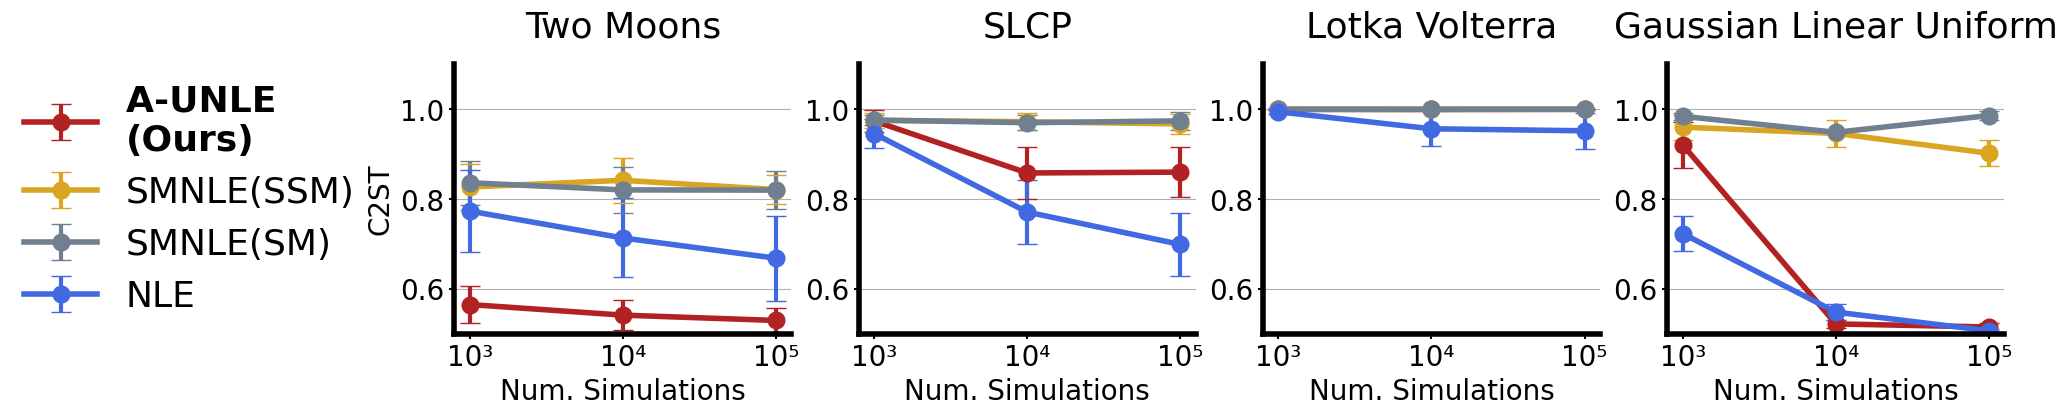

In [140]:
import matplotlib as mpl
import matplotlib.pyplot as plt

pretty_names = {
    "two_moons": "Two Moons",
    "slcp": "SLCP",
    "gaussian_linear_uniform": "Gaussian Linear Uniform",
    "lotka_volterra": "Lotka Volterra"
}
metric = "C2ST"
limits_metric = {
    "MMD": (0, 1),
    "C2ST": (0.5, 1.1)
}

errorbar_kws = dict(
    linewidth=4,
    elinewidth=3,
    markersize=12,
    capsize=7, 
    marker="o"
)


fontsize=26
tk_fontsize=20

with mpl.rc_context(fname='.matplotlibrc'):
    mpl.rc('font',family='DejaVu Sans')
    mpl.rc("text", usetex=False)
    
    # ax.plot(
    #     "-+",
    # )
    tasks = ("two_moons", "slcp", "lotka_volterra", "gaussian_linear_uniform")
    nrows = 1
    f, axss = plt.subplots(ncols=len(tasks), nrows=1, figsize=(5 * len(tasks), 3.5 * nrows))
    
    axs = axss
        
    for t_no, task in enumerate(tasks):
        ax = axs[t_no]
        ax.grid(axis="y")
        for axis in ['bottom','left']:
            ax.spines[axis].set_linewidth(4)
            
        ax.errorbar(
            ar.xs(task, level="task").xs("AUNLE", level="algorithm").groupby("num_simulations")[metric].mean().index,
            ar.xs(task, level="task").xs("AUNLE", level="algorithm").groupby("num_simulations")[metric].mean(),
            ar.xs(task, level="task").xs("AUNLE", level="algorithm").groupby("num_simulations")[metric].std(),
            label="A-UNLE \n(Ours)",
            color="firebrick",
            **errorbar_kws
        )


        ax.errorbar(
            ar.xs(task, level="task").xs("SMNLE(SSM)", level="algorithm").groupby("num_simulations")[metric].mean().index,
            ar.xs(task, level="task").xs("SMNLE(SSM)", level="algorithm").groupby("num_simulations")[metric].mean(),
            ar.xs(task, level="task").xs("SMNLE(SSM)", level="algorithm").groupby("num_simulations")[metric].std(),
            label="SMNLE(SSM)",
            color="goldenrod",
            **errorbar_kws
        )
        
        ax.errorbar(
            ar.xs(task, level="task").xs("SMNLE(SM)", level="algorithm").groupby("num_simulations")[metric].mean().index,
            ar.xs(task, level="task").xs("SMNLE(SM)", level="algorithm").groupby("num_simulations")[metric].mean(),
            ar.xs(task, level="task").xs("SMNLE(SM)", level="algorithm").groupby("num_simulations")[metric].std(),
            label="SMNLE(SM)",
            color="slategray",
            **errorbar_kws
        )


        ax.set_ylim(*limits_metric[metric])
        ax.errorbar(
            ar.xs(task, level="task").xs("NLE", level="algorithm").groupby("num_simulations")[metric].mean().index,
            ar.xs(task, level="task").xs("NLE", level="algorithm").groupby("num_simulations")[metric].mean(),
            ar.xs(task, level="task").xs("NLE", level="algorithm").groupby("num_simulations")[metric].std(),
            label="NLE",
            color="royalblue",
            **errorbar_kws
        )


        ax.set_ylim(*limits_metric[metric])


        ax.set_title(pretty_names[task], fontsize=fontsize, pad=20)
        ax.tick_params(axis='both', labelsize=tk_fontsize)
        # ax.get_xaxis().set_ticks([])
        ax.get_xaxis().set_ticklabels(
            # [num_simulations_str_map[v] for v in 
            # ar.xs(task, level="task").xs("AUNLE", level="algorithm").groupby("num_simulations")[metric].mean().index.values]
            ar.xs(task, level="task").xs("AUNLE", level="algorithm").groupby("num_simulations")[metric].mean().index,
        )
        ax.set_xlabel("Num. Simulations", size=20)

        
        
    l = axs[0].legend(fontsize=fontsize, bbox_to_anchor=(-0.2, 0.5), bbox_transform=axs[0].transAxes, loc="center right")
    l.texts[0].set_weight("bold")
    axs[0].set_ylabel("C2ST", size=20)
    
    # l = axs[0].legend(fontsize=fontsize, bbox_to_anchor=(-0.1, 0.5), bbox_transform=axs[0].transAxes, loc="center right")
    # l.texts[0].set_weight("bold")
        
    # plt.errorbar(x, y + 3, yerr=yerr, label='both limits (default)')
    

    # ax.legend(fontsize=18)
    # 
    # ax.set_ylabel("Energy. Distance", fontsize=14)
    # ax.set_xlabel("Round No.", fontsize=14)
# f
f.savefig("figures/c2st_sbibm_rebuttals_smnle_ssm_sm.pdf", dpi=300, bbox_inches='tight')

In [110]:
result = r.fetch_one_result(
    experience_name="paper_more_seeds_mi2000",
    task="two_moons",
    num_samples=(10000,), num_observation=2, 
    random_seed=1
)
ret_sunle = result.result

In [161]:
from sbi_ebm.sbibm.tasks import get_task
import torch
import numpy as np
from sbibm.visualisation import fig_posterior
import deneb as den

i = -1

f = fig_posterior(
    # samples_tensor=result.result.train_results.posterior_samples,
    # samples_tensor=result.result.single_round_results[i].posterior_samples,
    # samples_tensor=result.result.single_round_results[0].train_theta,
    # samples_tensor=torch.from_numpy(np.array(ret_sunle.train_results.posterior_samples)),
    samples_tensor=torch.from_numpy(np.array(ret_sunle.train_results.single_round_results[i].posterior_samples)),
    # num_samples=min(len(ret_sunle.train_results.single_round_results[i].posterior_samples), 1000),
    # task_name=result.result.train_results.config['task'],
    # task=get_task(result.result.train_results.config['task'])
    # task_name="LDCT",
    # task=get_task("LDCT")
    task_name=ret_sunle.train_results.config.task.task_name,
    task=get_task(ret_sunle.train_results.config.task.task_name),
    num_observation=ret_sunle.train_results.config.task.num_observation,
    # limits="Ref. Posterior"
)

den.set_style(width=100, height=100)
f

alt.VConcatChart(...)

In [132]:
import jax.numpy as jnp
from sbi_ebm.samplers.inference_algorithms.mcmc.base import MCMCAlgorithmFactory, MCMCAlgorithm, MCMCConfig
from sbi_ebm.samplers.kernels.mala import MALAConfig, MALAKernelFactory
from sbi_ebm.samplers.kernels.nuts import NUTSConfig, NUTSKernelFactory

factory = MCMCAlgorithmFactory(
    config=MCMCConfig(
        # kernel_factory=MALAKernelFactory(config=MALAConfig(0.01)),
        kernel_factory=NUTSKernelFactory(config=NUTSConfig(0.01, inverse_mass_matrix=jnp.ones((5,)))),
        num_samples=10000,
        num_chains=100,
        thinning_factor=10,
        num_warmup_steps=10000,
        adapt_mass_matrix=True,
        adapt_step_size=True
    )
)

In [133]:
from sbi_ebm.distributions import maybe_wrap
alg = factory.build_algorithm(
    maybe_wrap(ret_sunle.train_results.posterior.log_prob_zscored_space)
)

In [134]:
pr = ret_sunle.train_results.single_round_results[0].train_results.datasets[0].prior

In [135]:
from jax import random
key = random.PRNGKey(0)
alg = alg.init(key, pr)

In [136]:
from jax import jit
key, subkey = random.split(key)
alg, results_mcmc = jit(alg.run)(subkey)

finding good initial position


In [137]:
thetas_post = ret_sunle.train_results.posterior.z_transform(results_mcmc.samples.particles)

In [138]:
from sbi_ebm.sbibm.tasks import get_task
import torch
import numpy as np
from sbibm.visualisation import fig_posterior
import deneb as den

i = -1

f = fig_posterior(
    # samples_tensor=result.result.train_results.posterior_samples,
    # samples_tensor=result.result.single_round_results[i].posterior_samples,
    # samples_tensor=result.result.single_round_results[0].train_theta,
    # samples_tensor=torch.from_numpy(np.array(ret_sunle.train_results.posterior_samples)),
    samples_tensor=torch.from_numpy(np.array(thetas_post)),
    num_samples=min(len(ret_sunle.train_results.single_round_results[i].posterior_samples), 1000),
    # task_name=result.result.train_results.config['task'],
    # task=get_task(result.result.train_results.config['task'])
    # task_name="LDCT",
    # task=get_task("LDCT")
    task_name=ret_sunle.train_results.config.task.task_name,
    task=get_task(ret_sunle.train_results.config.task.task_name),
    num_observation=ret_sunle.train_results.config.task.num_observation,
    # limits="Ref. Posterior"
)

den.set_style(width=100, height=100)
f

alt.VConcatChart(...)

In [139]:
from sbibm.metrics import c2st
from sbibm.tasks import get_task
import torch
import numpy as np

c2st(
    torch.from_numpy(np.array(thetas_post)),
    get_task('slcp').get_reference_posterior_samples(1)
)

tensor([0.8355])

In [ ]:
O
from sbi_ebm.

In [45]:
eval_result.groupby("num_samples").c2st.mean()

num_samples
(100, 100, 100, 100, 100, 100, 100, 100, 100, 100)                        0.972778
(1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000)              0.675656
(10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000)    0.624533
Name: c2st, dtype: float64

In [18]:
eval_result.reset_index()['task'].unique()

array(['gaussian_linear_uniform', 'slcp', 'two_moons'], dtype=object)

In [92]:
# eval_result.c2st.std().

0.12314837711636427

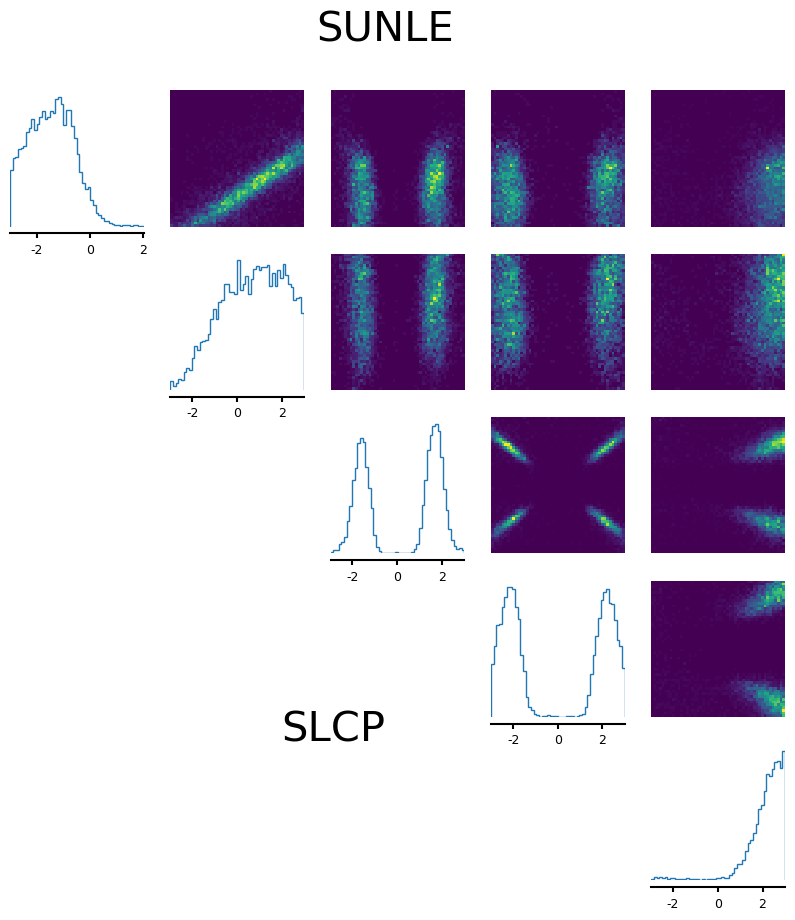

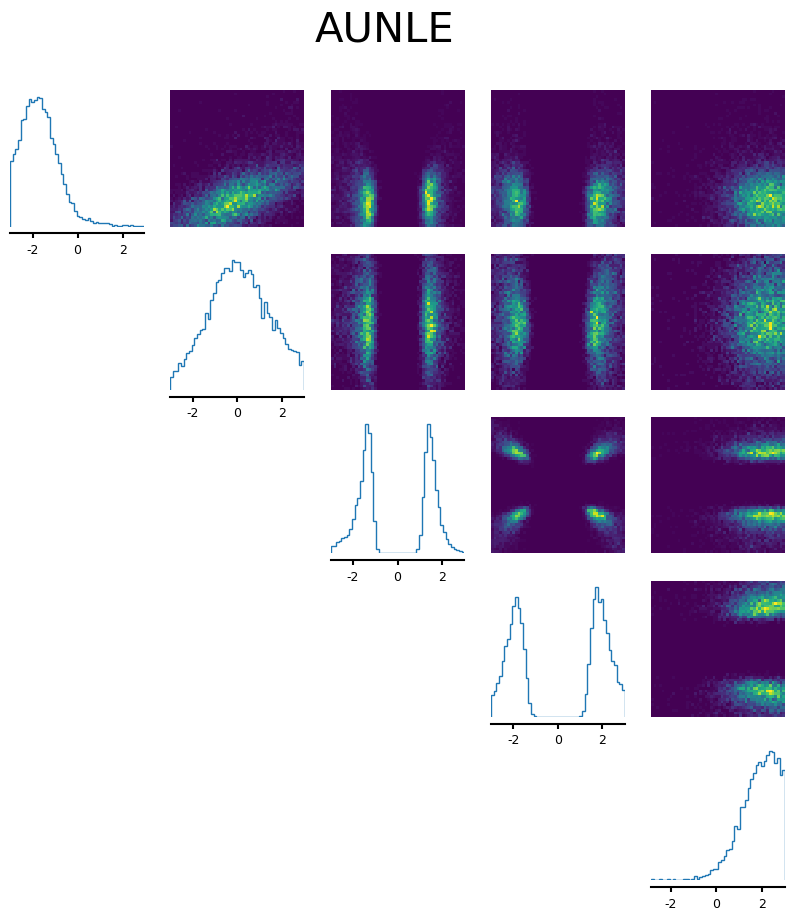

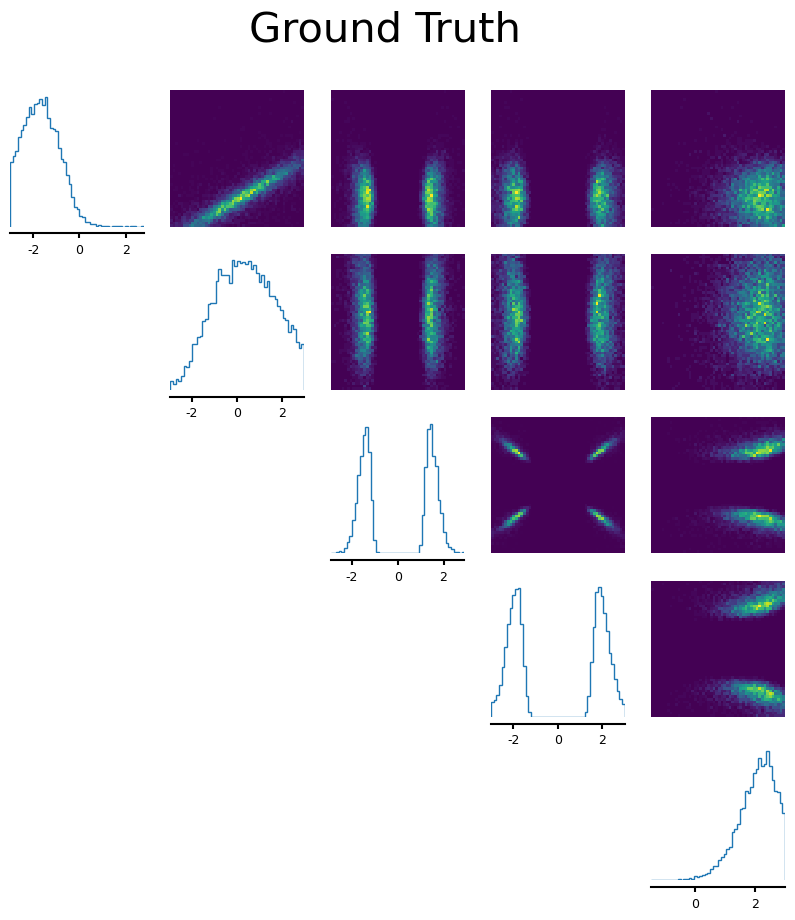

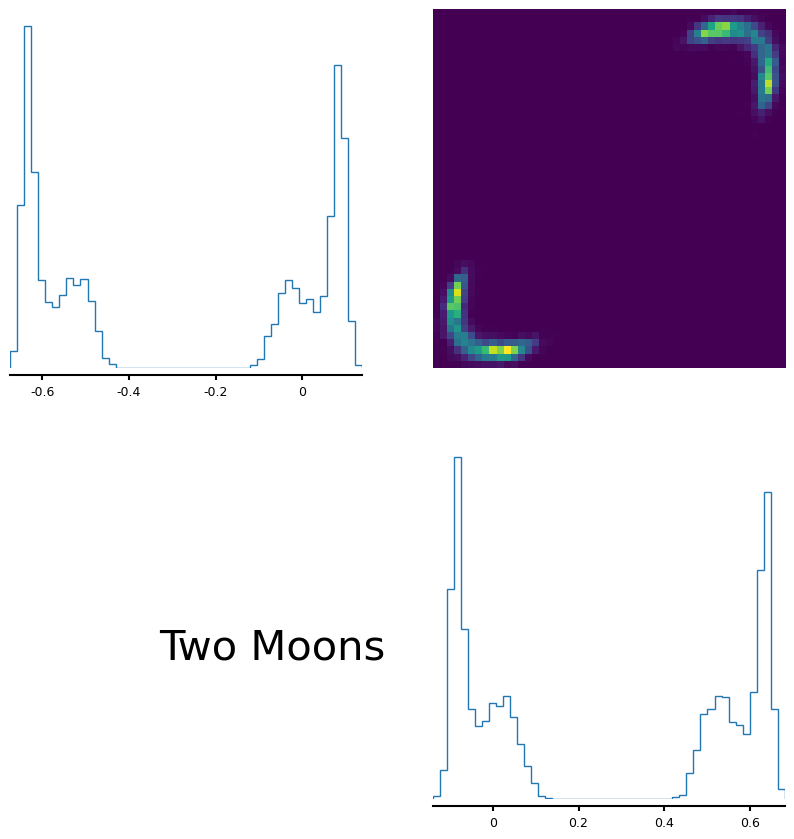

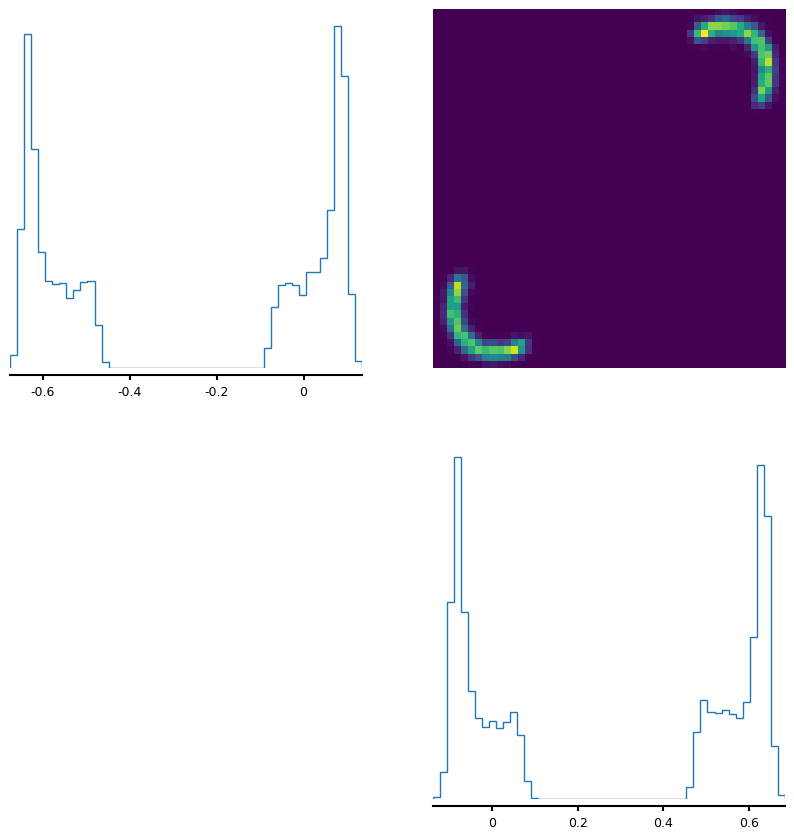

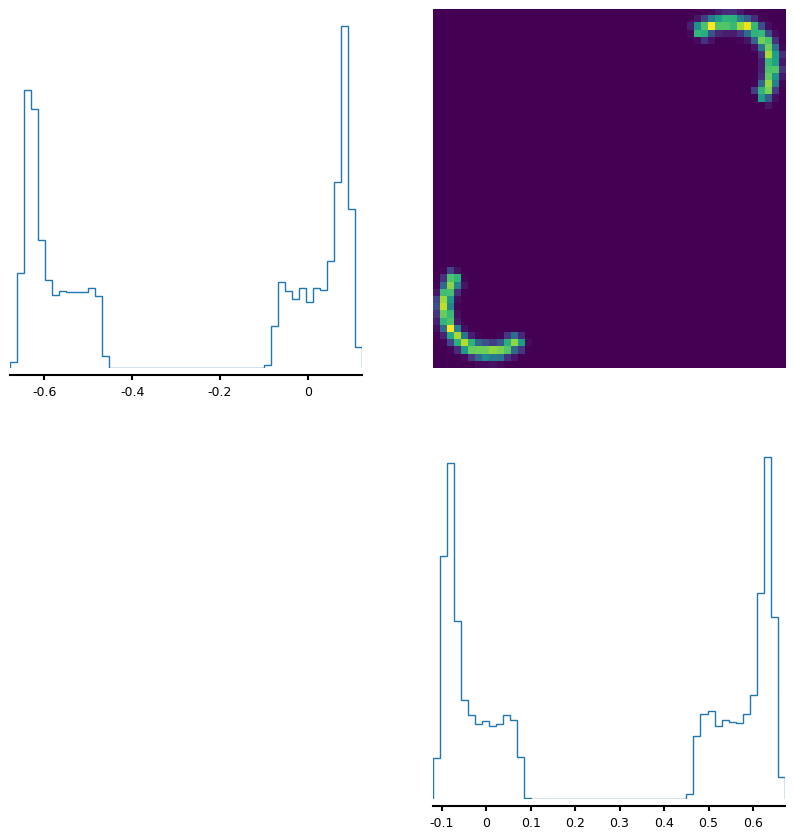

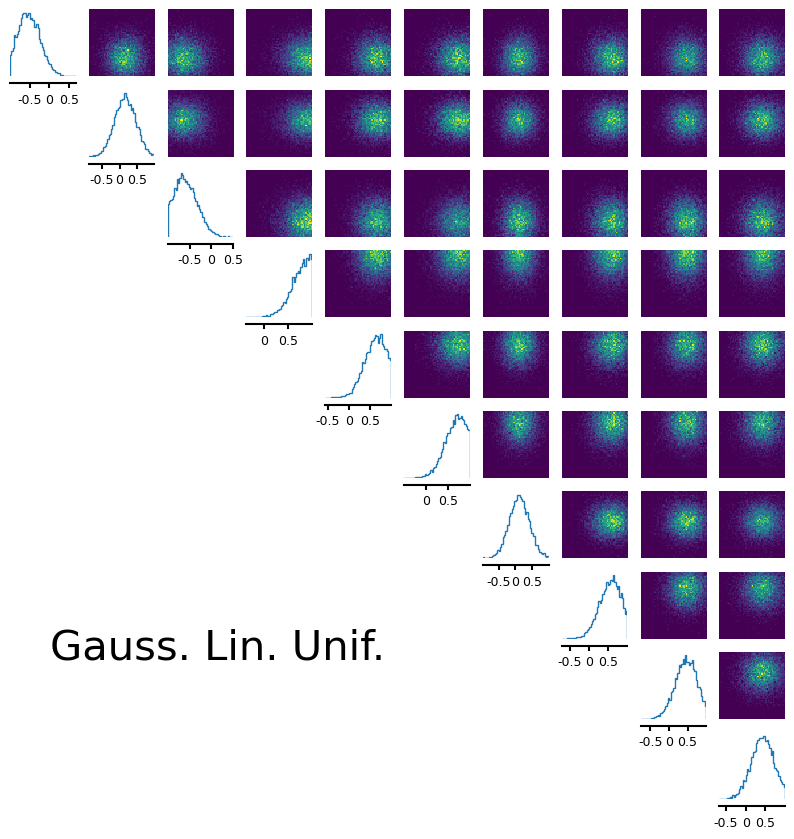

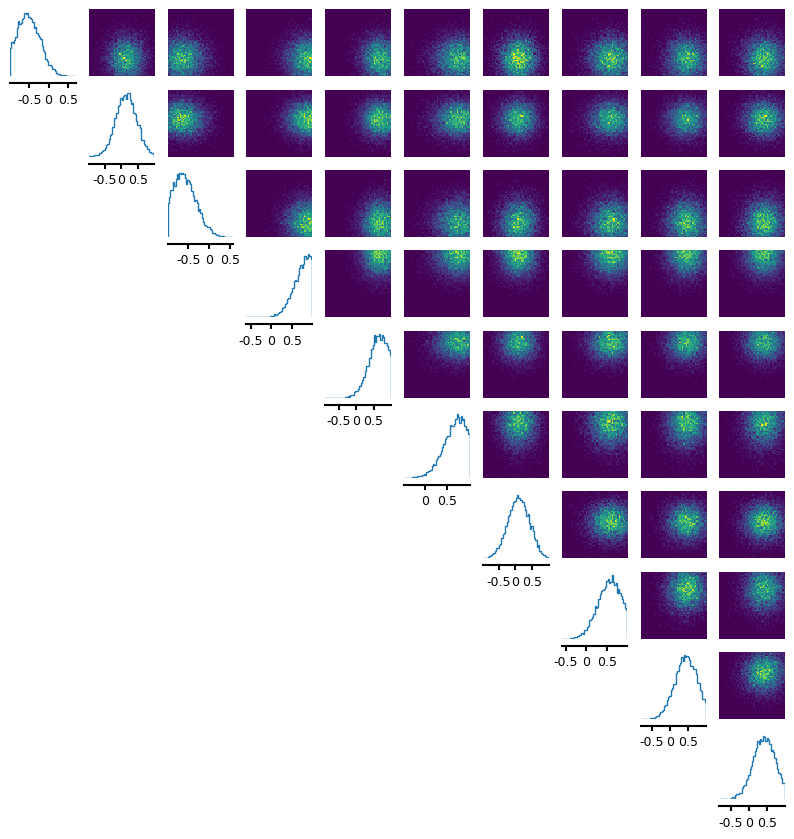

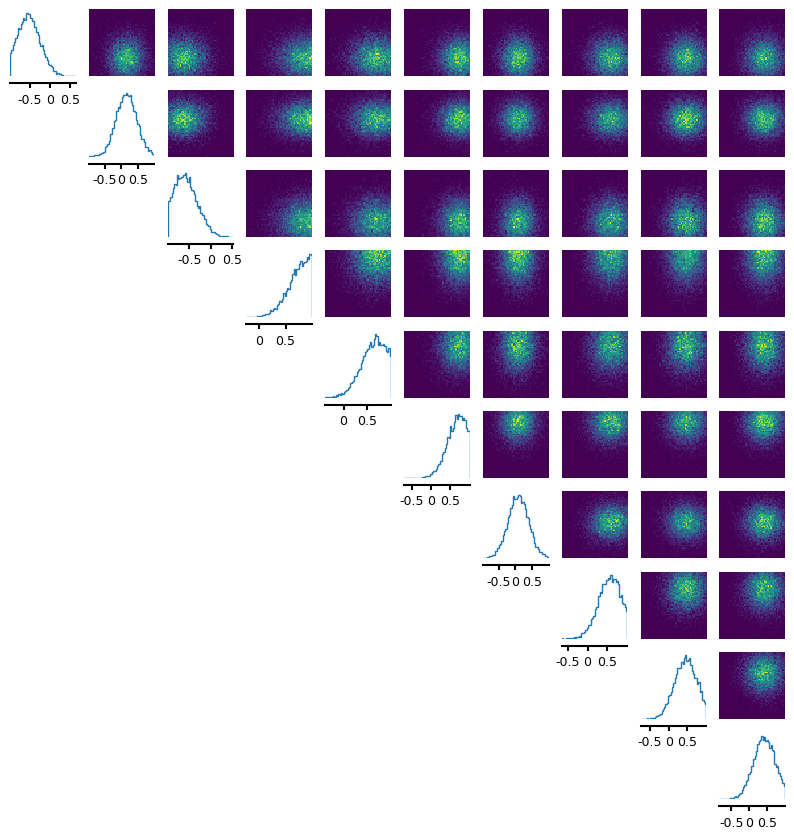

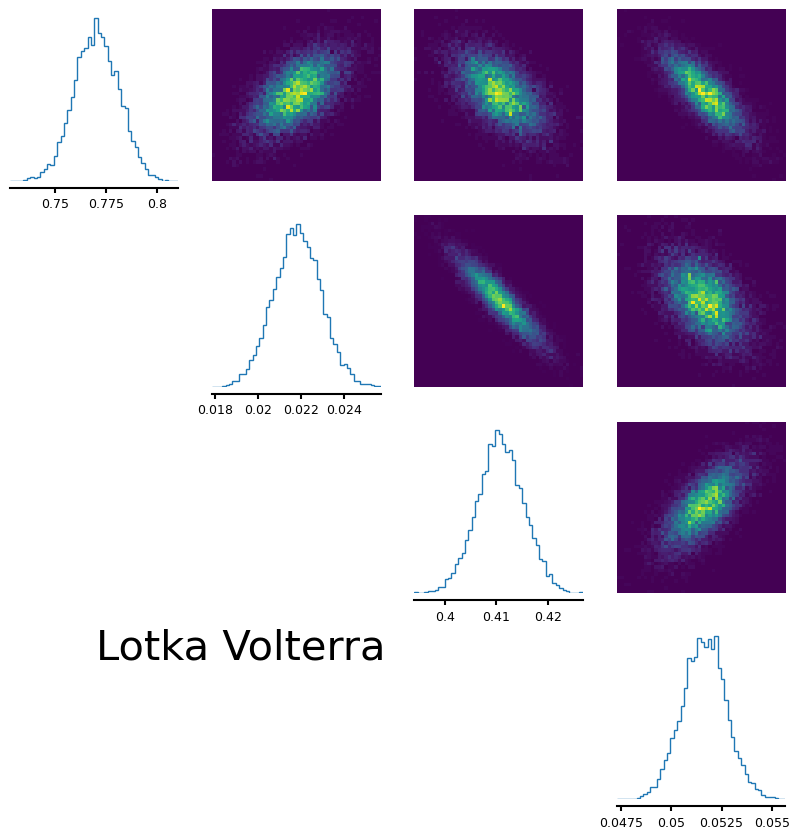

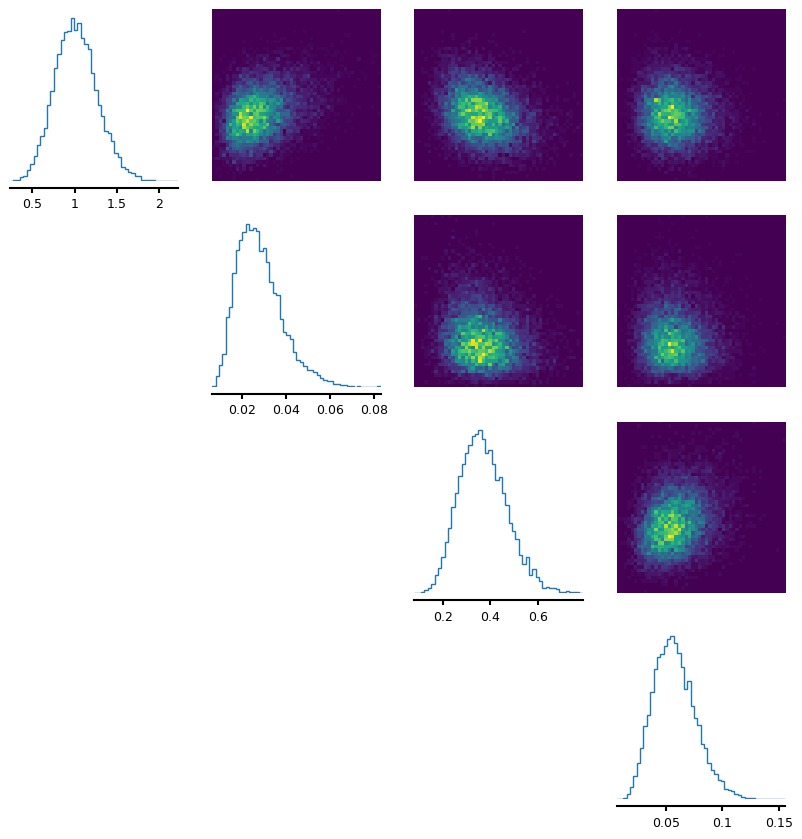

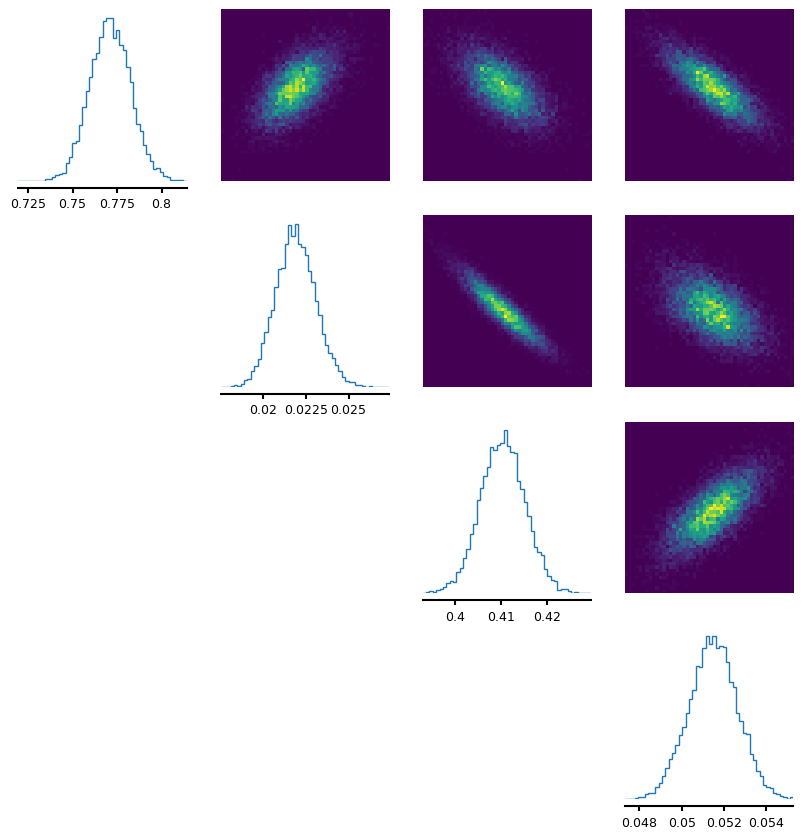

In [199]:
import torch
import numpy as np
from sbi.analysis.plot import pairplot

pretty_names = {
    "slcp": "SLCP",
    "lotka_volterra": "Lotka Volterra",
    "gaussian_linear_uniform": "Gauss. Lin. Unif.",
    "two_moons": "Two Moons"
}

with mpl.rc_context(fname='.matplotlibrc'):
    mpl.rc('font',family='DejaVu Sans')
    mpl.rc("text", usetex=False)
    for t in ("slcp", "two_moons", "gaussian_linear_uniform", "lotka_volterra"):
        result = r.fetch_one_result(
            experience_name="paper_more_seeds_warm_start",
            task=t, num_samples=(10000,)*10 , num_observation=6, random_seed=1
        )
        ret_sunle = result.result


        f, axs = pairplot(torch.from_numpy(np.array(ret_sunle.train_results.posterior_samples)))

        for i in range(ret_sunle.train_results.config.task.dim_parameters):
            # axs[i, i].get_xaxis().set_ticks([])
            axs[i, i].get_xaxis().set_label_text("")

        if t == "slcp":
            f.text(0.5, 0.95, "SUNLE", transform=f.transFigure, fontsize=30, horizontalalignment="center")

        f.text(0.5, 0.25, pretty_names[t], transform=f.transFigure, fontsize=30, horizontalalignment="right")


        f.savefig(f'figures/sunle_samples_{t}.pdf')

        result = r.fetch_one_result(
            experience_name="paper_more_seeds_mi2000",
            task=t, num_samples=(100000,), num_observation=6, random_seed=1
        )
        ret_sunle = result.result


        f, axs = pairplot(torch.from_numpy(np.array(ret_sunle.train_results.posterior_samples)))
        for i in range(ret_sunle.train_results.config.task.dim_parameters):
            # axs[i, i].get_xaxis().set_ticks([])
            axs[i, i].get_xaxis().set_label_text("")
            
        if t == "slcp":
            f.text(0.5, 0.95, "AUNLE", transform=f.transFigure, fontsize=30, horizontalalignment="center")

        f.savefig(f'figures/aunle_samples_{t}.pdf')
        import torch
        import numpy as np
        from sbi.analysis.plot import pairplot
        from sbibm.tasks import get_task
        f, axs = pairplot(torch.from_numpy(np.array(get_task(ret_sunle.train_results.config.task.task_name).get_reference_posterior_samples(ret_sunle.train_results.config.task.num_observation))))
        for i in range(ret_sunle.train_results.config.task.dim_parameters):
            # axs[i, i].get_xaxis().set_ticks([])
            axs[i, i].get_xaxis().set_label_text("")

        if t == "slcp":
            f.text(0.5, 0.95, "Ground Truth", transform=f.transFigure, fontsize=30, horizontalalignment="center")
        f.savefig(f'figures/reference_samples_{t}.pdf')

In [154]:
a = ret[1][0, 0].get_xaxis()

In [150]:
a.set_l

In [3]:
#result.slurm_out_file_contents

In [4]:
# eval_result = r.fetch_evaluation_results(
#     # max_iter=2000, task="slcp", ebm_model_type="likelihood", num_samples=(1000,) * 10)
#     # task="lotka_volterra", ebm_model_type="likelihood", num_samples=(10000,) * 10, inference_num_warmup_steps=2000
#     # task="slcp", ebm_model_type="likelihood", num_samples=(10000,) * 10, inference_num_warmup_steps=2000
#     experience_name="paper", task="lotka_volterra", num_samples=(10000,) * 10, inference_num_warmup_steps=2000, num_mala_steps=200
#     # task="slcp", num_samples=(10000,) * 10, inference_num_warmup_steps=2000, num_mala_steps=200
#     # task="two_moons", num_samples=(100000,),
# )

In [5]:
# eval_result

In [6]:
# from sbi_ebm.sbibm.tasks import get_task
# import torch
# import numpy as np
# from sbibm.visualisation import fig_posterior
# import deneb as den
# 
# f = fig_posterior(
#     # samples_tensor=result.result.train_results.posterior_samples,
#     # samples_tensor=result.result.single_round_results[i].posterior_samples,
#     # samples_tensor=result.result.single_round_results[0].train_theta,
#     # samples_tensor=torch.from_numpy(np.array(ret_sunle.train_results.posterior_samples)),
#     samples_tensor=torch.from_numpy(np.array(ret_sunle.train_results.single_round_results[-1].posterior_samples)),
#     num_samples=min(len(ret_sunle.train_results.posterior_samples), 1000),
#     # task_name=result.result.train_results.config['task'],
#     # task=get_task(result.result.train_results.config['task'])
#     # task_name="LDCT",
#     # task=get_task("LDCT")
#     task_name=ret_sunle.train_results.config.task.task_name,
#     task=get_task(ret_sunle.train_results.config.task.task_name),
#     num_observation=ret_sunle.train_results.config.task.num_observation,
#     # limits="Ref. Posterior"
# )
# 
# den.set_style(width=100, height=100)
# f